# Pràctica amb ordinador 2. Selecció i deriva

## Preparació
En aquesta pràctica, com en l'anterior, cal tenir nocions bàsiques del llenguatge de programació `R`: què és una funció, què són arguments, i per a què serveix l'operador `<-`. També s'assumeix un coneixement bàsic de com funciona un quadern de Jupyter (arxiu `.ipynb`).

Utilitzarem el paquet `learnPopGen` de R (Revell, 2019). Per tant, ens hem d'assegurar que està instal·lat (`install.packages('learnPopGen')`)
i l'hem de carregar en la sessió executant el comandament següent:

In [1]:
library('learnPopGen')
source('helper.R')

## Exercici 1. Selecció natural
La funció `selection()` permet representar el canvi de freqüència al·lèlica
en un locus amb dos al·lels sota selecció natural. El paràmetre `p0` determina
la freqüència inicial de l'al·lel **A**. El paràmetre `w` és el *vector* de les
tres eficàcies biològiques, corresponents als genotips **AA**, **Aa** i **aa**.
Podem fixar també el nombre de generacions durant les quals ha d'evolucionar la
població (`time = 400`, per exemple) i si volem que al gràfic es mostre la
freqüència d'equilibri (`equil = TRUE`, recomanable). A més, podem afegir una
segona simulació a un gràfic anterior si utilitzem el paràmetre `add = TRUE`.
Per exemple:

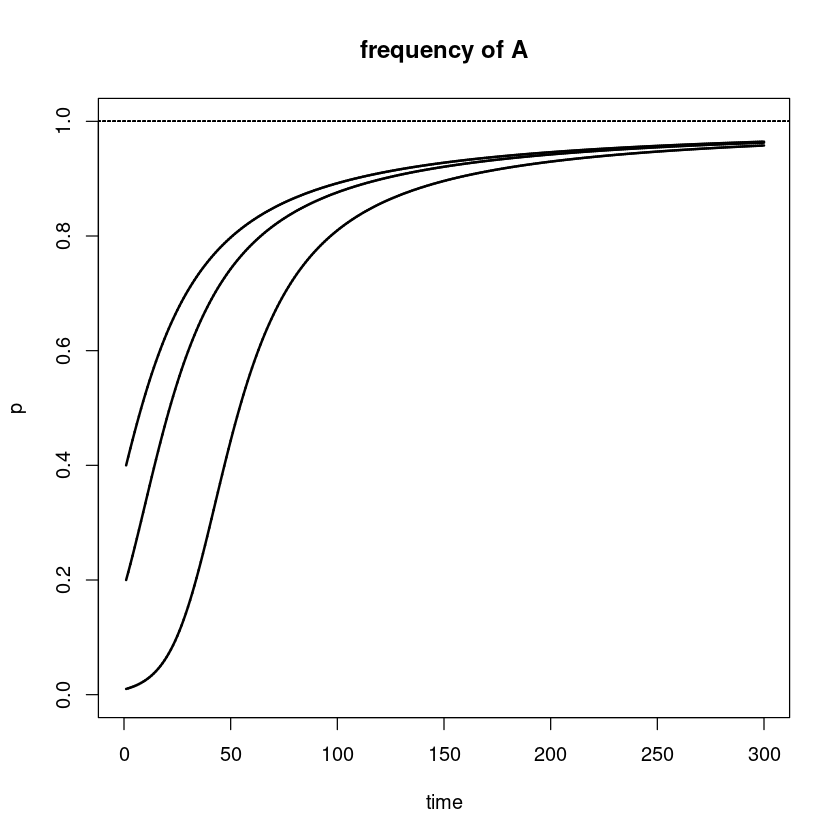

In [2]:
selection(p0 = 0.01, w = c(1, 1, 0.9), time = 300, pause = 0, show = 'p', equil = TRUE)
selection(p0 = 0.20, w = c(1, 1, 0.9), time = 300, pause = 0, show = 'p', add = TRUE)
selection(p0 = 0.40, w = c(1, 1, 0.9), time = 300, pause = 0, show = 'p', add = TRUE)

Comprova que pots utilitzar la funció `selection()` i aleshores observa què
passa en cada una de les situacions descrites a la taula següent. Observa que les
distribucions d'eficàcia biològica proposades per a cada model fan que l'al·lel
**A** (la freqüència del qual és la representada) siga dominant en un cas,
recessiu en un altre, i parcialment recessiu en el tercer. Assegura't d'utilitzar
diferents valors de freqüència inicial.

 | Model                             | Eficàcia d'**AA** | Eficàcia d'**Aa** | Eficàcia d'**aa** |
 | --------------------------------- |------------------:| -----------------:| -----------------:|
 | Selecció a favor del dominant     |          1.0      |         1.0       |         0.9       |
 | Selecció a favor del recessiu     |          1.0      |         0.8       |         0.8       |
 | Selecció a favor de l'heterozigot |          0.8      |         1.0       |         0.9       |

In [3]:
# Pots introduir ací els comandaments que necessites i executar-los.



Contesta les preguntes següents.

### 1.1 Com influeix la manera d'herència (recessiva o dominant) sobre la fixació d'un al·lel afavorit per la selecció natural?

### 1.2 Pots explicar el patró observat?

### 1.3 Quina peculiaritat caracteritza la selecció a favor de l'heterozigot?

### 1.4 Els equilibris assolits, són estables o inestables?

## Exercici 2. Deriva genètica
Per estudiar l'efecte de la deriva genètica sobre una població de mida finita,
utilitzarem la funció `genetic.drift()`, que accepta els paràmetres següents:

- `p0`: Freqüència inicial de l'al·lel **A** (0.5 per defecte).
- `Ne`: Mida poblacional efectiva (20 per defecte).
- `nrep`: Nombre de rèpliques a simular (10 per defecte).
- `time`: Nombre de generacions a simular.
- `show`: Opcions de representació gràfica:
   - `'p'`: la freqüència de l'al·lel **A** respecte del temps (per defecte).
   - `'fixedLast'`: proporció de poblacions en què al final s'ha fixat un al·lel o l'altre.
   - `'heterozygosity'`: l'heterozigositat observada i la teòrica respecte del temps.
   - `'genotypes'`: histograma *dinàmic* (o seqüència d'histogrames) de freqüències genotípiques.
- `pause`: Temps (segons) de pausa entre generacions, per suavitzar les animacions. Utilitza "0".

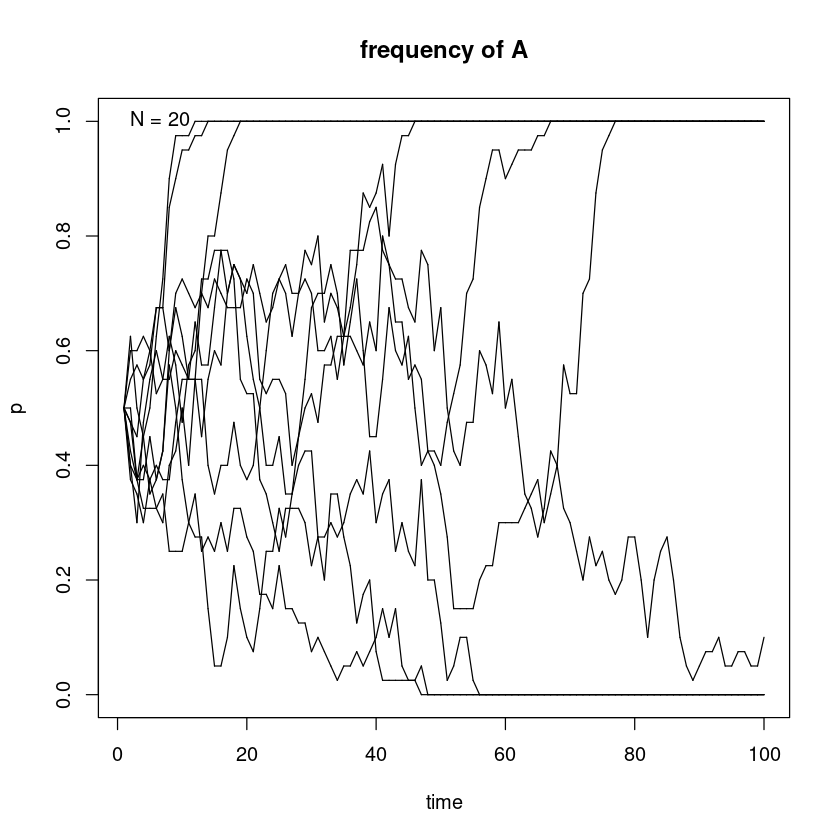

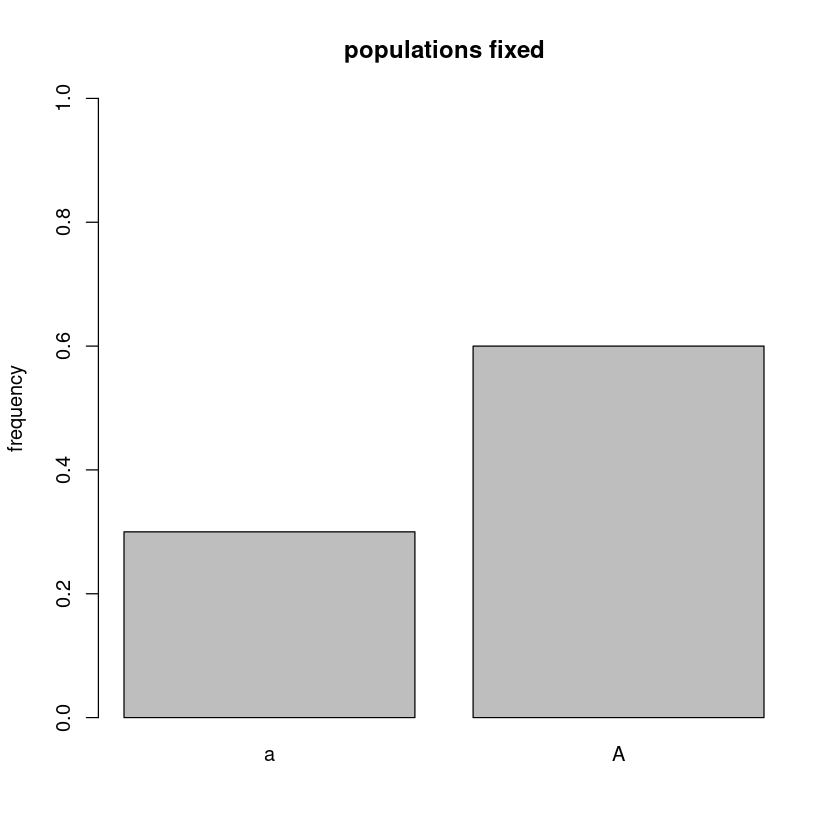

In [4]:
sim02 <- genetic.drift(p0 = 0.5,
                       Ne = 20,
                       nrep = 10,
                       time = 100,
                       pause = 0)
plot(sim02, show = 'fixedLast')

L'objectiu és determinar com afecten la mida poblacional (`Ne`) i la freqüència inicial de l'al·lel **A** (`p0`) a la proporció de casos en què al final de la simulació es fixa un al·lel o l'altre. Utilitza el bloc de codi a continuació per realitzar totes les simulacions necessàries per esbrinar-ho. És recomanable simular sempre 100 rèpliques (`nrep = 100`), durant 300 generacions (`time = 300`), i combinar quatre valors de `p0` (0.1, 0.2, 0.4 i 0.5), amb almenys tres valors diferents de `Ne` (10, 50 i 100). Si la simulació és massa lenta, redueix el nombre de generacions i prova només valors de `Ne` inferiors a 100.

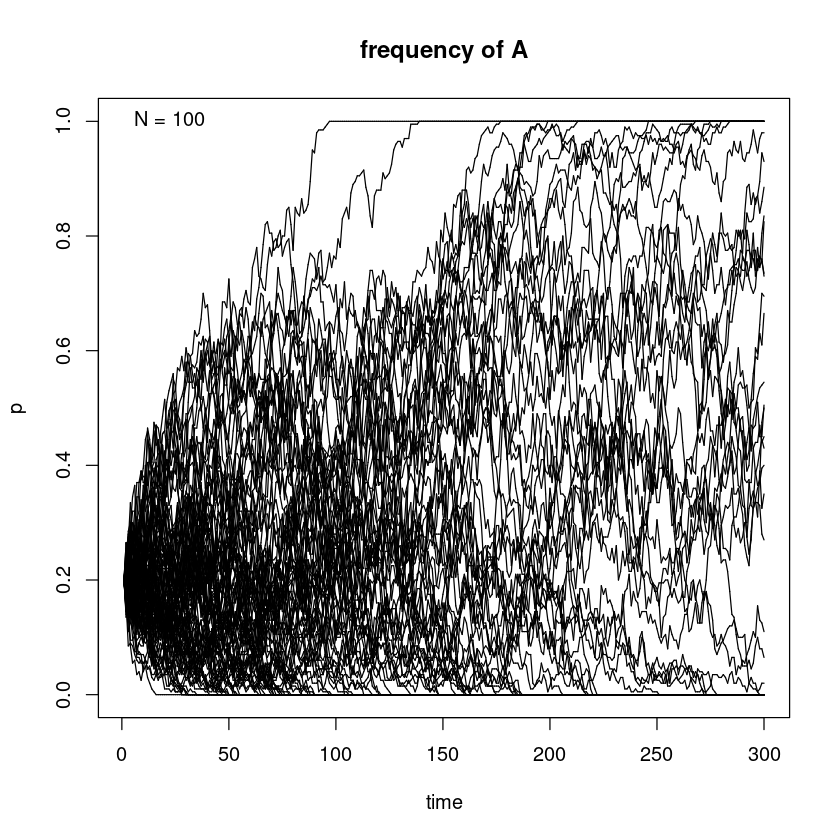

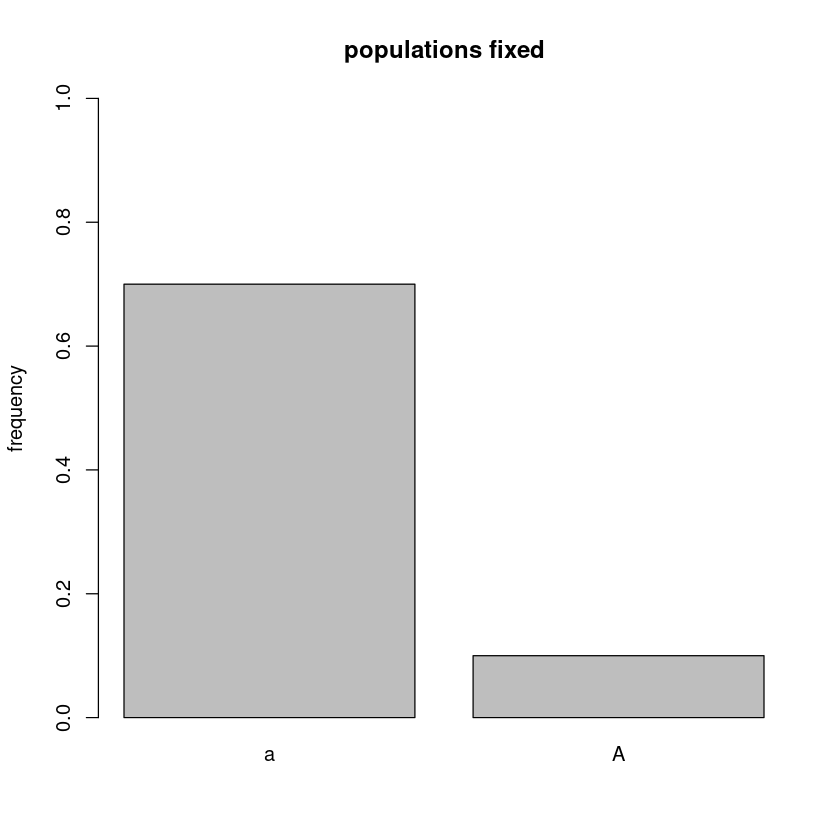

In [5]:
# Pots seleccionar el codi anterior, copiar-lo ("Ctrl+C"), pegar-lo ací,
# ("Ctrl+V"), modificar-lo i executar-lo ("Shift+Enter").

sim02 <- genetic.drift(p0 = 0.2,
                       Ne = 100,
                       nrep = 100,
                       time = 300,
                       pause = 0)
plot(sim02, show = 'fixedLast')

Intenta contestar les preguntes següents:

### 2.1 Si en una simulació fas 100 rèpliques (`nrep = 100`), cada rèplica representa una població. És possible predir els canvis de freqüència al·lèlica en una població concreta?

### 2.2 Hauràs observat que si es deixa passar prou de temps en qualsevol població només queda un dels dos al·lels. Quin factor influeix més en el *temps* que tarda en desaparéixer el polimorfisme?

### 2.3 Quin efecte té la freqüència al·lèlica inicial, $p_0$?

### 2.4 Sabent que en última instància es fixarà un al·lel o l'altre, sabries dir quina és la probabilitat de que acabe fixant-se cada al·lel?

## Exercici 3. Selecció i deriva
Quan un locus polimòrfic afecta l'eficàcia biològica en una població finita,
els canvis en les freqüències al·lèliques d'eixe locus estan determinades 
conjuntament per la selecció natural i per la deriva. Per simular poblacions
en què actuen alhora la selecció natural i la deriva utilitzarem la funció
`drift.selection()`, que admet els paràmetres següents:

- `p0`: freqüència inicial de l'al·lel **A**.
- `Ne`: Mida poblacional efectiva.
- `w`: vector d'eficàcies biològiques dels genotips **AA**, **Aa** i **aa**.
- `nrep`: Nombre de rèpliques a simular.
- `ngen`: Nombre de generacions total.

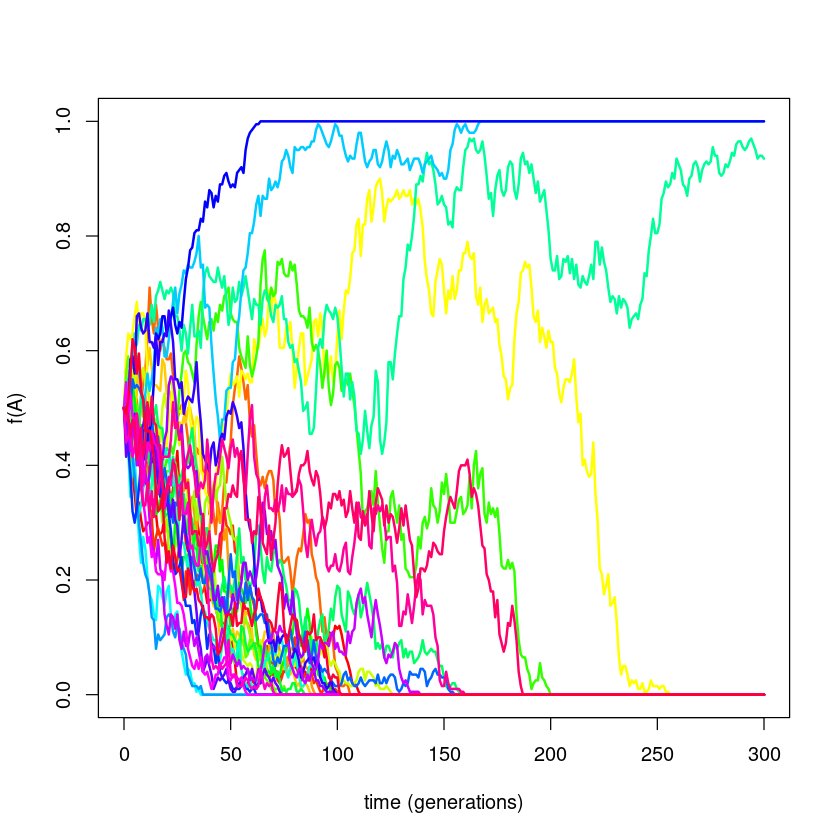

In [13]:
sim03 <- drift.selection(p0 = 0.5,
                         Ne = 100,
                         w = c(0.96, 0.96, 1.0),
                         nrep = 30,
                         ngen = 300)

Per estudiar l'efecte de la freqüència inicial (`p0`), la mida poblacional (`Ne`) i el mode de selecció natural (`w`), tens a continuació tres plantilles, una per a cada mode de selecció natural. Sobre cada plantilla, varia sistemàticament la freqüència incial (valors suggerits: 0.1, 0.2, 0.4 i 0.5) mantenint una mida poblacional constant `Ne = 50` (per exemple). I després, manté constant la freqüència inicial (`p0 = 0.2`, per exemple) i canvia la mida poblacional (10, 50 i 100, per exemple). Algunes simulacions poden ser lentes. Observa el cercle en el cantó dret superior de la finestra: si està fosc és que el *kernel* està treballant i t'has d'esperar. En acabar, contesta les preguntes següents.

In [ ]:
# Selecció a favor del dominant
sim03.1 <- drift.selection(p0 = 0.1,
                           Ne = 50,
                           w  = c(1.0, 1.0, 0.9),
                           nrep = 50,
                           ngen = 300)

In [ ]:
# Selecció a favor del recessiu
sim03.2 <- drift.selection(p0 = 0.1,
                           Ne = 50,
                           w  = c(1.0, 0.9, 0.9),
                           nrep = 50,
                           ngen = 300)

In [ ]:
# Selecció a favor de l'heterozigot
sim03.3 <- drift.selection(p0 = 0.1,
                           Ne = 50,
                           w  = c(0.8, 1.0, 0.9),
                           nrep = 50,
                           ngen = 300)

### 3.1 Quan un al·lel acaba fixant-se, pots determinar si ha sigut per causa de la deriva o per causa de la selecció natural?

### 3.2 Quan apareix un al·lel per mutació, la seua freqüència és 1/2N , si la població és diploide. Si aquest al·lel és beneficiós, en quina població creus que tindrà major probabilitat d’arribar a fixar-se, en una gran o en una petita? Per què?

### 3.3 La deriva dificulta la fixació de l’al·lel beneficiós. Ho fa de la mateixa manera quan l’al·lel és recessiu o dominant?

### 3.4 La selecció a favor de l’heterozigot tendeix a mantenir el polimorfisme. En les poblacions que has simulat, creus que el polimorfisme pot mantenir-se per sempre? Per què? Com ho comprovaries?

## Bibliografia
[1] Revell LJ (2019). *learnPopGen: Population Genetic Simulations & Numerical Analysis.* R package version 1.0.4, [https://CRAN.R-project.org/package=learnPopGen](https://CRAN.R-project.org/package=learnPopGen)